In [1]:
import keras

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.utils.np_utils import to_categorical

from PIL import Image

Using TensorFlow backend.


In [33]:
#carrega o banco de dados do mnist

(xTreino, yTreino), (xTeste, yTeste) = mnist.load_data()

In [31]:
#xTreino
xTeste.shape
#yTreino
#yTreino.shape

(10000, 32, 32)

In [36]:
#ajuste das dimensões das imagens

xTreino.resize((xTreino.shape[0], 32, 32), refcheck=False)
xTeste.resize((xTeste.shape[0], 32, 32))

xTreino = xTreino.reshape(xTreino.shape[0], 32, 32)
xTeste = xTeste.reshape(xTeste.shape[0], 32, 32)

In [ ]:
#One-hot encoding

yTreino = to_categorical(yTreino)
yTreino

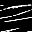

In [37]:
w, h = 32,32
data = xTreino[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

img

In [ ]:
def leNet():
    
    classificador = Sequential()
    
    #imagem 32x32
    #Camada convolucional 1
    classificador.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1)))
    
    #imagem 28x28
    #Camada de pooling 1
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    
    #imagem 14x14
    #Camada convolucional 2
    classificador.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (14,14,6)))
    
    #imagem 10x10
    #Camada de pooling 2
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    
    #imagem 5x5
    #Flatten
    classificador.add(Flatten())
    
    #Camada totalmente conectada 1
    classificador.add(Dense(units = 120, activation = 'relu'))
    
    #Camada totalmente conectada 2
    classificador.add(Dense(units = 84, activation = 'relu'))
    
    #Camada de saída
    classificador.add(Dense(units = 10, activation = 'softmax'))
    
    classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return  classificador